# Imports

In [ ]:
!pip install anthropic

In [ ]:
import os
import pandas as pd
# import anthropic
from json import loads,dumps
import time
from glob import glob
import json
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Set API key

In [ ]:
os.environ["ANTHROPIC_API_KEY"] = ""


Initialize model

In [ ]:
client = anthropic.Anthropic()



Prompt template

In [ ]:
prompt = """ A video is inappropriate for children if the description contains physical violence (cartoonish, realistic, inclusion of gore),
  interpersonal violence (such as bullying, pranks, meanness, humor at expense of others, belittling ,controlling, talking down to, or manipulating others),
  self-harm or suicide,
  elements of scariness (horror, scary themes, creepy or suspenseful themes, loud and violent content, zombies, skeletons, scary masks, scary clowns, blood, fire in dangerous settings),
  mentally distressing scenes (car crashes, medical procedures etc),
  extreme stunts (depictions of life endangering or high-risk physical activities/challenges),
  sexual content (innuendos, overt sexual behavior, nudity, sexual themes, sexual suggestiveness),
  discrimination (based on race/ethnicity/gender/ability),
  offensive language (from mild words such as "idiot" and "stupid" to severe swearing, hate speech or signs),
  drinking, drugs, smoking, gambling, crude humour,
  inappropriate clothing (with significant skin exposure),
  death,
  intimacy (sensual physical contact, dating and relationships, apparent romantic conduct between subjects/actors).

  You have been given a textual description of a video:
  "{description}"

  Based on this descriptive text, is the video inappropriate according to the criteria above?
  If it is, label it as "inappropriate".
  If it is not, label it as "irrelevant".
  If the video is directed towards kids, label it as "child-directed".

  Justify your conclusion.

  Also, if language is provided, you may analyze it with that as well.

  Make the outputs in JSON format.
  """

Define function

In [ ]:
def classify_video(model, text_input):

  response = model.messages.create(
    model="claude-3-5-sonnet-20240620",
    system = "You are a content classification assistant that evaluates video descriptions according to strict guidelines.",
    max_tokens=1024,
    messages=[
        {"role": "user", "content": text_input}
    ]
    )

  return response.content[0].text

Test

In [ ]:
description = """
"
VIDEO DURATION: 1:32

GENERAL OVERVIEW: This is a movie trailer for the French comedy film ""Les Blagues de Toto 2: Classe Verte"" (Toto's Jokes 2: Green Class). The trailer focuses on the antics of a mischievous young boy named Toto, who is on a school trip to a farm.

DETAILED TIMELINE:
[00:00-00:08] - The trailer begins with a scene inside a house. A woman (mother) is talking to her son, Toto, about his school trip. Toto, dressed in a striped shirt, is sitting at the table, appearing bored. The scene then cuts to a schoolyard where children, including Toto, are playing.
[00:08-00:21] - The trailer transitions to a scene of teachers preparing for the school trip.  There's a shot of a bus pulling away from the school and kids on the bus. The bus is filled with excited children.
[00:21-00:32] - The bus arrives at the farm. Children get off the bus and Toto is introduced to the farmhouse. Shots of farm animals and the setting are shown.
[00:32-00:55] - The trailer shows children interacting with the farm animals, playing games, and engaging in various activities. The atmosphere is fun and lighthearted.
[00:55-01:15] -  Toto's mother is talking about Toto being a ""little sly fox,"" and we see him being mischievous. The trailer then transitions to a night scene where Toto is up to more shenanigans, including scaring a character. The trailer cuts to a montage of various scenes of children having fun at the farm, highlighting the humorous and lighthearted nature of the movie.
[01:15-01:32] - The trailer ends with various comedic scenes involving Toto, including a chase scene. The film title ""Les Blagues de Toto 2: Classe Verte"" (Toto's Jokes 2: Green Class) is displayed, along with the release date ""Au cinéma le 2 août"" (In theaters August 2nd).

AUDIO DESCRIPTION: The trailer features a lively and upbeat soundtrack that blends with various sound effects. The dialogue is primarily in French, with a lighthearted and playful tone. The trailer uses comedic sound effects to emphasize the humorous situations.

NOTABLE ELEMENTS:
- The trailer features a bright and colorful visual style, with a whimsical and playful tone.
- It focuses on children, making it likely to appeal to a family audience.
- The presence of farm animals and outdoor scenes adds to the wholesome theme.
- The movie title and release date are clearly displayed.

TECHNICAL NOTES:
- The trailer is professionally produced, with high-quality video and editing.
- The use of fast cuts, music, and sound effects contributes to the overall tone and pace of the trailer.
- The editing is dynamic and effectively highlights the movie's humorous elements.

"
"""

In [ ]:
formatted_prompt = prompt.format(description=description,label='')
print(formatted_prompt)

 A video is inappropriate for children if the description contains physical violence (cartoonish, realistic, inclusion of gore),
  interpersonal violence (such as bullying, pranks, meanness, humor at expense of others, belittling ,controlling, talking down to, or manipulating others),
  self-harm or suicide,
  elements of scariness (horror, scary themes, creepy or suspenseful themes, loud and violent content, zombies, skeletons, scary masks, scary clowns, blood, fire in dangerous settings),
  mentally distressing scenes (car crashes, medical procedures etc),
  extreme stunts (depictions of life endangering or high-risk physical activities/challenges),
  sexual content (innuendos, overt sexual behavior, nudity, sexual themes, sexual suggestiveness),
  discrimination (based on race/ethnicity/gender/ability),
  offensive language (from mild words such as "idiot" and "stupid" to severe swearing, hate speech or signs),
  drinking, drugs, smoking, gambling, crude humour,
  inappropriate clot

In [ ]:
classification = classify_video(client, formatted_prompt)
print(classification)

Here's my analysis in JSON format:

{
  "label": "child-directed",
  "justification": "The video description indicates a family-friendly comedy film targeted primarily at children. The content appears to be lighthearted and playful, focusing on the adventures of a mischievous young boy named Toto during a school trip to a farm. There are no clear indications of inappropriate content based on the given criteria. The trailer emphasizes fun, humor, and wholesome activities involving children, farm animals, and outdoor scenes. While there is mention of Toto being 'mischievous' and engaging in 'shenanigans', these appear to be presented in a comedic, child-appropriate manner rather than promoting harmful behavior. The bright, colorful visuals and upbeat soundtrack further support its child-friendly nature. The movie is likely designed to appeal to a family audience, with children as the primary target demographic.",
  "language_analysis": "The dialogue is primarily in French, with a lighthe

# Running for all videos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Safe Online Global/csvs/final_desc_without_inaudible_excluded.csv',index_col=0)
df

Mounted at /content/drive


,video_id,gemini_descriptions,primary_tag,secondary_tag,rating,manual_description
0,PFNtS5E5VTo,\n\nVIDEO DURATION: 00:14\n\nGENERAL OVERVIEW...,child directed,Toys,NaN,disney toys
1,a3FUPmqyz74,\n\n\nVIDEO DURATION: 00:31\n\nGENERAL OVERVI...,child directed,Play and Adventure,NaN,outdoor summer activities and pool
2,dMBevlP_R_g,\n\nVIDEO DURATION: 00:15\n\nGENERAL OVERVIEW...,child directed,Toys,NaN,lego toys
3,enNOZJSDFFs,\nVIDEO DURATION: 0:30\n\nGENERAL OVERVIEW: T...,child directed,Play and Adventure,NaN,"skistar holidays, activities for kids"
4,fOdo1GkzZAk,\nVIDEO DURATION: 04:28\n\nGENERAL OVERVIEW: ...,child directed,Educational Content,NaN,adapted mind ad
...,...,...,...,...,...,...
780,aBpSfU6IwuU,\nVIDEO DURATION: 00:35\n\nGENERAL OVERVIEW: ...,child directed,Toys,NaN,monster high doll unboxing
781,6OymTXVO_Is,\nVIDEO DURATION: 00:29\n\nGENERAL OVERVIEW: ...,child directed,Toys,NaN,monster high doll
782,2BVILYtTs1o,\nVIDEO DURATION: 00:20\n\nGENERAL OVERVIEW: ...,child directed,Family friendly gaming,NaN,nintendo ad for animal crossing
783,ZRbpmnFKBUY,\nVIDEO DURATION: 02:39\n\nGENERAL OVERVIEW: ...,child directed,Poems/Songs/Nursery Rhymes/Music,NaN,No Apologies (Music Video) ft. That Girl Lay L...


In [ ]:
video_ids = df['video_id'].to_list()
video_descriptions = df['gemini_descriptions'].to_list()

In [ ]:
print(len(video_ids))

752


In [ ]:
outputs = {}

In [ ]:
len(outputs)

32

In [ ]:
c = 348
for i,v in enumerate(video_ids[348:400]):
  try:
    desc = video_descriptions[i]

    formatted_prompt = prompt.format(description=desc)

    classification = classify_video(client, formatted_prompt)

    outputs[v] = classification

    with open(f'/content/drive/MyDrive/Safe Online Global/pipeline2-claude-second-prompt/{v}.json', 'w') as f:
      f.write(classification)

    print("Completed for",i+c)


  except:
    print(f"Error for video num: {i+c}, id={v}")
    time.sleep(45)
    desc = video_descriptions[i]

    formatted_prompt = prompt.format(description=desc)

    classification = classify_video(client, formatted_prompt)

    outputs[v] = classification

    with open(f'/content/drive/MyDrive/Safe Online Global/pipeline2-claude-second-prompt/{v}.json', 'w') as f:
      f.write(classification)

    print("Completed for",i+c)

  time.sleep(15)

Completed for 348
Completed for 349
Error for video num: 350, id=4nSCaTz6MGM


RateLimitError: Error code: 429 - {'type': 'error', 'error': {'type': 'rate_limit_error', 'message': 'Number of request tokens has exceeded your daily rate limit (https://docs.anthropic.com/en/api/rate-limits); see the response headers for current usage. Please reduce the prompt length or the maximum tokens requested, or try again later. You may also contact sales at https://www.anthropic.com/contact-sales to discuss your options for a rate limit increase.'}}

In [ ]:
i = 723
try:
    v = video_ids[i]

    desc = video_descriptions[i]

    formatted_prompt = prompt.format(description=desc)

    classification = classify_video(client, formatted_prompt)

    outputs[v] = classification

    with open(f'/content/drive/MyDrive/Safe Online Global/pipeline2-claude-first-prompt/{v}.json', 'w') as f:
      f.write(classification)

    print("Completed for",i)


except:
    print(f"Error for video num: {i}, id={v}")

Error for video num: 723, id=5WXtbxIYtSQ


Eval

In [ ]:
# all_jsons = glob("/content/drive/MyDrive/Safe Online Global/pipeline2-claude-second-prompt/*.json")
# print(all_jsons)
output_dir = '/content/drive/MyDrive/Safe Online Global/pipeline2-claude-second-prompt'
all_jsons = {}

# Loop over all files in the directory
for filename in os.listdir(output_dir):
    # Check if the file is a JSON file
    if filename.endswith('.json'):
        file_path = os.path.join(output_dir, filename)

        # Extract the video ID from the filename (remove '.json' extension)
        video_id = filename[:-5]

        try:
            # Load the JSON content
            with open(file_path, 'r') as f:
                classification = json.load(f)

            # Add the classification to the outputs dictionary with video_id as the key
            all_jsons[video_id] = classification

        except json.JSONDecodeError as e:
            # Print error message and skip the file
            print(f"Error decoding JSON for file {filename}: {e}")
        except Exception as e:
            # Catch any other exceptions
            print(f"Unexpected error for file {filename}: {e}")

print("Loaded all valid JSON files into the `outputs` dictionary.")

Error decoding JSON for file PFNtS5E5VTo.json: Invalid control character at: line 3 column 348 (char 387)
Error decoding JSON for file a3FUPmqyz74.json: Invalid control character at: line 3 column 244 (char 274)
Error decoding JSON for file dMBevlP_R_g.json: Invalid control character at: line 3 column 160 (char 190)
Error decoding JSON for file enNOZJSDFFs.json: Expecting value: line 1 column 1 (char 0)
Error decoding JSON for file l-wtFtZn-QU.json: Expecting value: line 1 column 1 (char 0)
Error decoding JSON for file lM01TQKLYF0.json: Invalid control character at: line 3 column 267 (char 297)
Error decoding JSON for file pNQvIPHsNT4.json: Expecting value: line 1 column 1 (char 0)
Error decoding JSON for file oaEb34AYL48.json: Invalid control character at: line 3 column 141 (char 170)
Error decoding JSON for file 9T9I56-c72g.json: Invalid control character at: line 3 column 141 (char 170)
Error decoding JSON for file 25CTmfakE0w.json: Expecting value: line 1 column 1 (char 0)
Error de

In [ ]:
print(len(all_jsons))

159


In [ ]:
predictions = {}

new_outputs = {}
for k,v in all_jsons.items():
  try:
    new_outputs[k] = json.loads(v)
  except:
    print(k)

# for j in all_jsons:
#   with open(j,'r') as f:
#     video_id = j.split('/')[-1].split('.')[0]

#     try:
#       predictions[video_id] = loads(f.read())
#       print("slay")
#     except:
#       print(f"Error for video id: {video_id}")

# for k,v in outputs.items():
#   print(k,loads(v))



fOdo1GkzZAk
_PF66j7Fmjo
-kGC-gustpA
m3MI_GZk2Xs
EDn5Wo8okXk
Fm9krnyIunE
kVjk1W65B04
dRje7cZhls4
-sYV2DonEzY
5IweIDfW_Ws
nZ_ChJpufrc
XUuIuxWuTNw
Vbwrsqdoy4k
oP70SLOh5Ow
14G6xHIQn3o
Ko_MFKNR5Y4
QpnHaKNCaT0
WhQfqd5WpE0
lvyHA4UmEVw
XzD2wrCtIGY
cAMHx-m9oh8
BHLVY4NNF6A
osPUC2K7tNs
yVPzFqioARY
5YUAQh0NemA
mxrZqIA4660
cLXbzi8rC7s
q41N_5Yy_-E
tYKduNKGmUI
q-NVK13mzcA
qWFcB3ZqYpQ
hRyFE5xFjfY
CrM0k0bJ73Q
BqQRPRNRZ3U
lqH-0-olhDU
KrckpFsWK_A
Izl2dIW8f-E
9neRRdw6d0A
VWnq7XrJ7Ys
Lrgk65yn3d8
YMFtTWhzH2k
0p0Ip9K09B4
6e-PaAe5mOg
rss4fwYspec
POzry-eNtgk
9eDd9rGftA4
ZTUoDmiUzRo
FtbiSbl_5KE
4EwxbCpsiyE
ez6f-aYXfSU
EIMLG8uKK5Y
0eOQOwTnsGg
wURw58DWiOA
8sLS2knUa6Y
D0PuuZeX2qk
kBqrf1LvpPo
Z7RRjkCbwAM
AqjEIeYvQPA
pxy849Tlmw8
OnzaZ4JUrfg
2Hc1OjFxv-M
1tStpmg7HF8
EFIFazsqKlw
N_wj_lVMFFU
CxUcLE-SuqE
8PtIYM7mHz8
NuKNRFi-sJw
5Dpk6GyunJU
vNTz1bQ9o0Q
KjK06CxurgA
pPs_ftHlRuE
rg2aZV7UmEY
Dsg1ERB7Jmw
9uyS14YN3MI
M8h2vG8UHcA
UpZvRarHOPI
pUS3z5dABmY
gCrRM4eA_pw
bmEmgo8ssL8
ZdEEAtokL-g
GQqCdJGwR-M
IOVrStZPmrg
y5fzgkuEvjg
EmM5

In [ ]:
with open(f'pipeline2-claude-2.json', 'w') as f:
      f.write(dumps(predictions))


In [ ]:
len(predictions)

156

In [ ]:
ground_labels_df = pd.read_csv('/content/drive/MyDrive/Safe Online Global/csvs/ground_labels.csv')
ground_labels_df

,Video link,Primary Tag,Secondary Tag,Rating,Description,Available?
0,5KRcG9gVhio,inappropriate,Offensive language,Extreme,spanish mv; lyrics inappropriate,Yes
1,1dtzSRlfBDk,child directed,Educational Content,NaN,ad about a Math and logic based visual game. ...,Yes
2,1EYvCnQj1uQ,inappropriate,Offensive language,Extreme,spanish mv; inapp lyrics,Yes
3,qZKNY_jwcu8,inappropriate,Sexual content,Extreme,"spanish mv with a lot of sensual content, viol...",Yes
4,-Qv06jgZZNw,inappropriate,Death,Extreme,"spanish mv, bullet shots, scariness, suggestiv...",Yes
...,...,...,...,...,...,...
2515,eRaJzy7dtTk,child directed,Cartoons,NaN,ad for a compilation of the cartoon baby alive,Yes
2516,BqHBzimyRbM,irrelevant,Home and Lifestyle,NaN,Ad for a company that has deals on furnishing,Yes
2517,rYSTqeFRLo8,irrelevant,Gaming & Entertainment,NaN,Ad for a game to build settlements,Yes
2518,CllAJ6PkRIA,irrelevant,Health and Wellness,NaN,Ad for a medicinal supplement,Yes


In [ ]:
claude_labels = []
ground_labels = []
print(predictions)


for k,v in predictions.items():

  if v["label"] == 'inappropriate':
    claude_labels.append(0) ## 0 is in app
  else:
    claude_labels.append(1) ##

  if ground_labels_df[ground_labels_df['Video link']==k]['Primary Tag'].values[0] == 'inappropriate':
    ground_labels.append(0)
  else:
    ground_labels.append(1)

{'fOdo1GkzZAk': {'label': 'child-directed', 'justification': 'Based on the provided description, this video appears to be specifically directed towards children and does not contain any inappropriate content according to the given criteria. The video features animated characters, educational content about focus and addition, and encourages learning in a fun, interactive way. The characters are described as monsters, but they are portrayed in a friendly, non-threatening manner. There is no mention of violence, scary themes, sexual content, offensive language, or any other inappropriate elements. The video promotes positive values such as learning and personal growth, which are suitable for a young audience. The cheerful tone, colorful visuals, and interactive elements further support its classification as child-directed content.', 'language_analysis': 'Not applicable as no specific language samples were provided in the description.'}, '_PF66j7Fmjo': {'label': 'irrelevant', 'justificatio

KeyError: 'label'

In [ ]:
print("Accuracy:",accuracy_score(ground_labels,claude_labels))

Accuracy: 0.699724517906336


In [ ]:
cf = confusion_matrix(ground_labels,claude_labels)

In [ ]:
cf

## Confusion matrix whose i-th row and j-th column entry indicates the
## number of samples with true label being i-th class and predicted label being j-th class.


array([[118,  90],
       [128, 390]])

<Axes: >

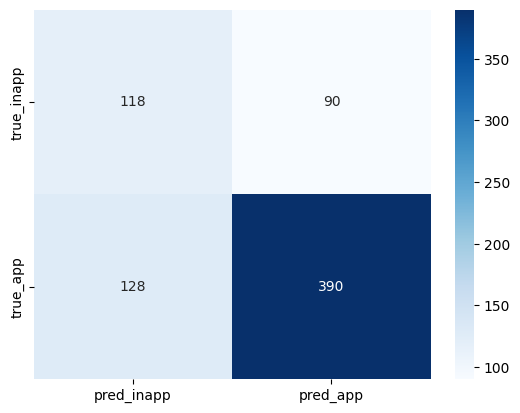

In [ ]:
sns.heatmap(cf, annot=True,xticklabels=['pred_inapp','pred_app'], yticklabels=['true_inapp','true_app'],cmap="Blues",fmt="g")

In [ ]:
print(classification_report(ground_labels,claude_labels))

              precision    recall  f1-score   support

           0       0.48      0.57      0.52       208
           1       0.81      0.75      0.78       518

    accuracy                           0.70       726
   macro avg       0.65      0.66      0.65       726
weighted avg       0.72      0.70      0.71       726

